In [ ]:
def nuemros(h):
        match h:
            case '00':
                return 'cero'
            case '01':
                return 'uno'
            case '02':
                return 'dos'
            case '03':
                return 'tres'
            case '04':
                return 'cuatro'
            case '05':
                return 'cinco'
            case '06':
                return 'seis'
            case '07':
                return 'siete'
            case '08':
                return 'ocho'
            case '09':
                return 'nueve'
            case '10':
                return 'diez'
            case '11':
                return 'once'
            case '12':
                return 'doce'
            case '13':
                return 'trece'
            case '14':
                return 'catorce'
            case '15':
                return 'quince'
            case '16':
                return 'dieciséis'
            case '17':
                return 'diecisiete'
            case '18':
                return 'dieciocho'
            case '19':
                return 'diecinueve'
            case '20':
                return 'veinte'
            case '21':
                return 'veintiuno'
            case '22':
                return 'veintidós'
            case '23':
                return 'veintitrés'
            case '24':
                return 'veinticuatro'
            case '25':
                return 'veinticinco'
            case '26':
                return 'veintiséis'
            case '27':
                return 'veintisiete'
            case '28':
                return 'veintiocho'
            case '29':
                return 'veintinueve'
            case '30':
                return 'treinta'
            case '31':
                return 'treinta y uno'
            case '32':
                return 'treinta y dos'
            case '33':
                return 'treinta y tres'
            case '34':
                return 'treinta y cuatro'
            case '35':
                return 'treinta y cinco'
            case '36':
                return 'treinta y seis'
            case '37':
                return 'treinta y siete'
            case '38':
                return 'treinta y ocho'
            case '39':
                return 'treinta y nueve'
            case '40':
                return 'cuarenta'
            case '41':
                return 'cuarenta y uno'
            case '42':
                return 'cuarenta y dos'
            case '43':
                return 'cuarenta y tres'
            case '44':
                return 'cuarenta y cuatro'
            case '45':
                return 'cuarenta y cinco'
            case '46':
                return 'cuarenta y seis'
            case '47':
                return 'cuarenta y siete'
            case '48':
                return 'cuarenta y ocho'
            case '49':
                return 'cuarenta y nueve'
            case '50':
                return 'cincuenta'
            case '51':
                return 'cincuenta y uno'
            case '52':
                return 'cincuenta y dos'
            case '53':
                return 'cincuenta y tres'
            case '54':
                return 'cincuenta y cuatro'
            case '55':
                return 'cincuenta y cinco'
            case '56':
                return 'cincuenta y seis'
            case '57':
                return 'cincuenta y siete'
            case '58':
                    return 'cincuentay ocho'
            case '59':
                    return 'cincuentay nueve'
            case _:
                    return 'Valor no reconocido'


def hora_literal(hora):
    result=''
    literal=hora.split(':',1)
    for h in literal:
        result=result+' '+nuemros(h)
    print(result)




In [82]:
import cv2
import matplotlib.pyplot as plt

def recortar(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(contour)
    imagen_result = image[y:y+h, x:x+w]
    return imagen_result


5
 tres cincuenta y dos


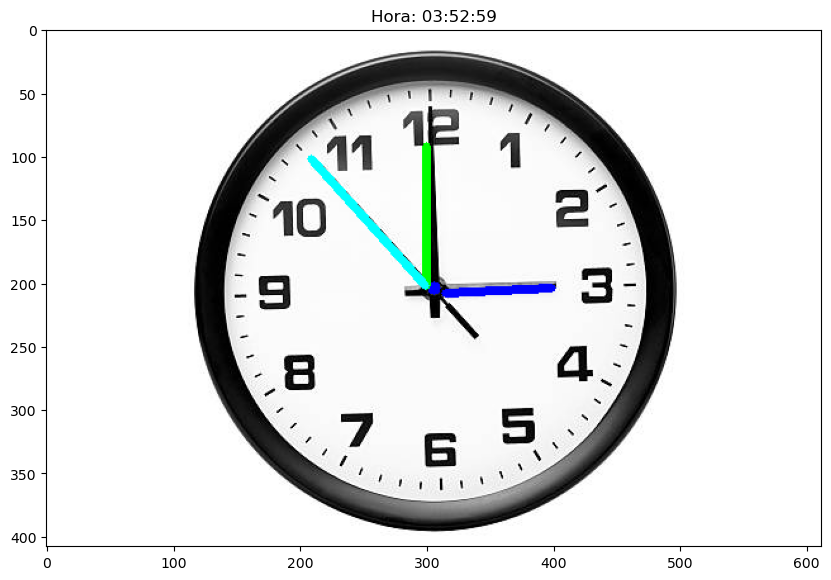

In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


from date_time_literal import ConvertTime
from datetime import datetime



#imagen_bgr = cv2.imread('../imagenes/RELOJ.jpeg')
#imagen_bgr = cv2.imread('../imagenes/Reloj2.jpg')
#imagen_bgr = cv2.imread('../imagenes/Reloj4.png')
imagen_bgr = cv2.imread('../imagenes/Reloj10.jpg')
#imagen_bgr = cv2.imread('../imagenes/Reloj6.png')

imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
imagen_rgb=recortar(imagen_rgb)
gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)

gris = cv2.GaussianBlur(gris, (5, 5), 1)
gris = cv2.equalizeHist(gris)
bordes = cv2.Canny(gris, 50, 150)

#plt.imshow(bordes,cmap='gray')


# Detección de líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=5)

centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

#centro_x=450
#centro_y=400

def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 > dist2:
        dx = x1 - centro_x
        dy = centro_y - y1
    else:
        dx = x2 - centro_x
        dy = centro_y - y2
    angulo = np.degrees(np.arctan2(dy, dx))
    angulo = (90 - angulo) % 360
    return angulo

manecillas = []
if lineas is not None:
    for linea in lineas:
        
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_centro = min(np.hypot(x1 - centro_x, y1 - centro_y),np.hypot(x2 - centro_x, y2 - centro_y))
        # LINEAS CENTRO
        if distancia_centro < 100 and 50 < longitud < 300:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({
                'puntos': (x1, y1, x2, y2),
                'longitud': longitud,
                'angulo': angulo
            })

print(f'{len(manecillas)}')
if len(manecillas) >= 3:
    # CORTO LARGO
    manecillas.sort(key=lambda x: x['longitud'])
    segundero = manecillas[-2]
    minutero = manecillas[-1]
    horario = manecillas[0]
    
    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)
    segundos =int((segundero['angulo']/6)%60)
    fraccion_hora = (horario['angulo'] / 30) % 12
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12

    imagen_resultado = imagen_rgb.copy()
    cv2.circle(imagen_resultado, (centro_x, centro_y), 5, (0, 0, 255), -1)
    cv2.line(imagen_resultado,(horario['puntos'][0], horario['puntos'][1]),(horario['puntos'][2], horario['puntos'][3]), (0, 0, 255), 5)  # horario azul
    cv2.line(imagen_resultado,(segundero['puntos'][0], segundero['puntos'][1]),(segundero['puntos'][2], segundero['puntos'][3]),(0, 255, 0), 5)  # minutero verde
    cv2.line(imagen_resultado,(minutero['puntos'][0], minutero['puntos'][1]),(minutero['puntos'][2], minutero['puntos'][3]),(0, 255, 255), 5)  #cian


#    for linea in lineas:
#        x1, y1, x2, y2 = linea[0]
#        cv2.line(imagen_resultado,(x1,y1),(x2,y2),(0,0,255),5)

    plt.figure(figsize=(10, 10))
    hora_literal(f'{hora:02d}:{minutos:02d}')
    plt.imshow(imagen_resultado)
    plt.title(f'Hora: {hora:02d}:{minutos:02d}:{segundos:02d}')
    plt.show()

